在这之前先读取10X数据

In [1]:
library(Seurat)
library(dplyr)
library(patchwork)
# library(readr)
library(ggplot2)
#有云服务器的，可开启并运算，这里我用4个线程：
library(future)
library(qs)
# check the current active plan
plan()
# change the current plan to access parallelization
plan("multisession", workers =40)
plan()

#设置可用的内存
# options(future.globals.maxSize = 4 * 1024^3)
plan("sequential")
future::plan()

Attaching SeuratObject

‘SeuratObject’ was built with package ‘Matrix’ 1.7.3 but the current
version is 1.7.4; it is recomended that you reinstall ‘SeuratObject’ as
the ABI for ‘Matrix’ may have changed

Seurat v4 was just loaded with SeuratObject v5; disabling v5 assays and
validation routines, and ensuring assays work in strict v3/v4
compatibility mode


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


qs 0.27.3. Announcement: https://github.com/qsbase/qs/issues/103



sequential:
- args: function (..., envir = parent.frame(), workers = "<NULL>")
- tweaked: FALSE
- call: plan(sequential)
FutureBackend to be launched

multisession:
- args: function (..., workers = 40)
- tweaked: TRUE
- call: plan("multisession", workers = 40)
MultisessionFutureBackend:
Inherits: ClusterFutureBackend, MultiprocessFutureBackend, FutureBackend
UUID: b42973f36bf48ad324930800b67f2cba
Number of workers: 40
Number of free workers: 40
Available cores: 80
Automatic garbage collection: FALSE
Early signaling: FALSE
Interrupts are enabled: TRUE
Maximum total size of globals: +Inf
Maximum total size of value: +Inf
Argument ‘rscript_libs’: "/home/guoliming/micromamba/envs/R4.4.3/lib/R/library"
Argument ‘persistent’: FALSE
Argument ‘wait.timeout’: 86400
Argument ‘wait.interval’: 0.01
Argument ‘wait.alpha’: 1.01
Argument ‘hooks’: FALSE
Number of active futures: 0
Number of futures since start: 0 (0 created, 0 launched, 0 finished)
Total runtime of futures: 0 secs (NaN secs/finished future)
Workers of type RichSOCKcluster:
- Summary: Socket cluster with 40 nodes on host ‘localhost’ (R version 4.4.3 (2025-02-28), platform x86_64-conda-linux-gnu)
- [ OK ] Node 1/40: valid connection, alive [RichSOCKnode of a socket cluster on local host 'localhost' with pid 19479 (R version 4.4.3 (2025-02-28), x86_64-conda-linux-gnu) using socket connection #5 ('<-localhost:11449')]
- [ OK ] Node 2/40: valid connection, alive [RichSOCKnode of a socket cluster on local host 'localhost' with pid 19518 (R version 4.4.3 (2025-02-28), x86_64-conda-linux-gnu) using socket connection #6 ('<-localhost:11449')]
- [ OK ] Node 3/40: valid connection, alive [RichSOCKnode of a socket cluster on local host 'localhost' with pid 19507 (R version 4.4.3 (2025-02-28), x86_64-conda-linux-gnu) using socket connection #7 ('<-localhost:11449')]
- [ OK ] Node 4/40: valid connection, alive [RichSOCKnode of a socket cluster on local host 'localhost' with pid 19494 (R version 4.4.3 (2025-02-28), x86_64-conda-linux-gnu) using socket connection #8 ('<-localhost:11449')]
- [ OK ] Node 5/40: valid connection, alive [RichSOCKnode of a socket cluster on local host 'localhost' with pid 19502 (R version 4.4.3 (2025-02-28), x86_64-conda-linux-gnu) using socket connection #9 ('<-localhost:11449')]
- [ OK ] Node 6/40: valid connection, alive [RichSOCKnode of a socket cluster on local host 'localhost' with pid 19481 (R version 4.4.3 (2025-02-28), x86_64-conda-linux-gnu) using socket connection #10 ('<-localhost:11449')]
- [ OK ] Node 7/40: valid connection, alive [RichSOCKnode of a socket cluster on local host 'localhost' with pid 19500 (R version 4.4.3 (2025-02-28), x86_64-conda-linux-gnu) using socket connection #11 ('<-localhost:11449')]
- [ OK ] Node 8/40: valid connection, alive [RichSOCKnode of a socket cluster on local host 'localhost' with pid 19480 (R version 4.4.3 (2025-02-28), x86_64-conda-linux-gnu) using socket connection #12 ('<-localhost:11449')]
- [ OK ] Node 9/40: valid connection, alive [RichSOCKnode of a socket cluster on local host 'localhost' with pid 19488 (R version 4.4.3 (2025-02-28), x86_64-conda-linux-gnu) using socket connection #13 ('<-localhost:11449')]
- [ OK ] Node 10/40: valid connection, alive [RichSOCKnode of a socket cluster on local host 'localhost' with pid 19492 (R version 4.4.3 (2025-02-28), x86_64-conda-linux-gnu) using socket connection #14 ('<-localhost:11449')]
- [ OK ] Node 11/40: valid connection, alive [RichSOCKnode of a socket cluster on local host 'localhost' with pid 19514 (R version 4.4.3 (2025-02-28), x86_64-conda-linux-gnu) using socket connection #15 ('<-localhost:11449')]
- [ OK ] Node 12/40: valid connection, alive [RichSOCKnode of a socket cluster on local host 'localhost' with pid 19485 (R version 4.4.3 (2025-02-28), x86_64-conda-linux-gnu) using socket connection #16 ('<-localhost:11449')]
- [ OK ] Node 13/40: valid connection, alive [RichSOCKnode of a socket cluster on local host 'localhost' with pid 19489 (R version 4.4.3 (2025-02-28), x86_64-conda-linux-gnu) using socket connection #17 ('<-localhost:11449')]
- [ OK ] Node 14/40: valid connection, alive [RichSOCKnode of a

sequential:
- args: function (..., envir = parent.frame(), workers = "<NULL>")
- tweaked: FALSE
- call: plan("sequential")
SequentialFutureBackend:
Inherits: FutureBackend
UUID: eca2017cfb0c464c3540713faacda0a1
Number of workers: 1
Number of free workers: 1
Available cores: 80
Automatic garbage collection: FALSE
Early signaling: FALSE
Interrupts are enabled: TRUE
Maximum total size of globals: +Inf
Maximum total size of value: +Inf
Argument ‘hooks’: FALSE
Number of active futures: 0
Number of futures since start: 0 (0 created, 0 launched, 0 finished)
Total runtime of futures: 0 secs (NaN secs/finished future)

### 质量控制并确定变异基因

In [2]:
# qread速度很快
library(qs)
system.time({
    seurat.data = qread(file = "./Outdata/Step3.Cluster_annotion.qs")
           })

   user  system elapsed 
  5.293   1.602   6.897 

In [4]:
table(seurat.data@meta.data$celltype)


            B cells   Endothelial cells    Epithelial cells          Fibroblast 
               2645                2617                1288                2987 
         Macrophage         Neutrophils            NK cells Other Myeloid cells 
               7239                8215                3641                2434 
          Platelets Smooth muscle cells             T cells 
                224                 384                2895 

In [5]:
# 定义免疫细胞类别
immune_types <- c("B cells","Macrophage","Neutrophils","NK cells","Other Myeloid cells","T cells")

# 增加新列 immune
seurat.data$immune <- ifelse(seurat.data$celltype %in% immune_types,
                             "Immune cells",
                             "Non-immune cells")


In [7]:
pdf(file="Immune_UMAP.pdf",width=6.5,height=6)
# 默认用seurat_clusters列（最后一次聚类得到的列）
DimPlot(seurat.data, reduction = "umap", group.by = "immune", label = TRUE) & NoAxes()
dev.off()

agg_record_1977467161 
                    2

In [8]:
## 只选择一部分数据
seurat.data = subset(seurat.data, immune %in% c("Immune cells"))

In [9]:
#使用PercentageFeatureSet函数计算线粒体基因的百分比
seurat.data[["percent.mt"]] <- PercentageFeatureSet(object = seurat.data, pattern = "^mt-")
pdf(file="04.featureViolin.pdf",width=10,height=6)           #保存基因特征小提琴图
VlnPlot(object = seurat.data, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3,group.by = "group")
dev.off()
seurat.data <- subset(x = seurat.data, subset = nFeature_RNA > 50 & percent.mt < 5)    #对数据进行过滤


Warning message:
“The `slot` argument of `GetAssayData()` is deprecated as of SeuratObject 5.0.0.
ℹ Please use the `layer` argument instead.
ℹ The deprecated feature was likely used in the Seurat package.
  Please report the issue at <https://github.com/satijalab/seurat/issues>.”
Warning message:
“The `slot` argument of `FetchData()` is deprecated as of SeuratObject 5.0.0.
ℹ Please use the `layer` argument instead.
ℹ The deprecated feature was likely used in the Seurat package.
  Please report the issue at <https://github.com/satijalab/seurat/issues>.”
Warning message:
“`PackageCheck()` was deprecated in SeuratObject 5.0.0.
ℹ Please use `rlang::check_installed()` instead.
ℹ The deprecated feature was likely used in the Seurat package.
  Please report the issue at <https://github.com/satijalab/seurat/issues>.”


agg_record_312928385 
                   2

In [10]:
#测序深度的相关性绘图
pdf(file="04.featureCor.pdf",width=10,height=6)              #保存基因特征相关性图
plot1 <- FeatureScatter(object = seurat.data, feature1 = "nCount_RNA", feature2 = "percent.mt",pt.size=1.5,group.by = "group")
plot2 <- FeatureScatter(object = seurat.data, feature1 = "nCount_RNA", feature2 = "nFeature_RNA",,pt.size=1.5,group.by = "group")
CombinePlots(plots = list(plot1, plot2))
dev.off()


Warning message in CombinePlots(plots = list(plot1, plot2)):
“CombinePlots is being deprecated. Plots should now be combined using the patchwork system.”


agg_record_312928385 
                   2

In [11]:
#对数据进行标准化
seurat.data <- NormalizeData(object = seurat.data, normalization.method = "LogNormalize", scale.factor = 10000)
#提取那些在细胞间变异系数较大的基因
seurat.data <- FindVariableFeatures(object = seurat.data, selection.method = "vst", nfeatures = 2000)



Warning message:
“The `slot` argument of `SetAssayData()` is deprecated as of SeuratObject 5.0.0.
ℹ Please use the `layer` argument instead.
ℹ The deprecated feature was likely used in the Seurat package.
  Please report the issue at <https://github.com/satijalab/seurat/issues>.”


In [12]:
seurat.data

An object of class Seurat 
34329 features across 27069 samples within 1 assay 
Active assay: RNA (34329 features, 2000 variable features)
 3 layers present: counts, data, scale.data
 3 dimensional reductions calculated: pca, umap, harmony

In [13]:
#输出特征方差图
top10 <- head(x = VariableFeatures(object = seurat.data), 10)
pdf(file="04.featureVar.pdf",width=10,height=6)              #保存基因特征方差图
plot1 <- VariableFeaturePlot(object = seurat.data)
plot2 <- LabelPoints(plot = plot1, points = top10, repel = TRUE)
CombinePlots(plots = list(plot1, plot2))
dev.off()

Warning message:
“The `selection.method` argument of `HVFInfo()` is deprecated as of SeuratObject
5.0.0.
ℹ Please use the `method` argument instead.
ℹ The deprecated feature was likely used in the Seurat package.
  Please report the issue at <https://github.com/satijalab/seurat/issues>.”
When using repel, set xnudge and ynudge to 0 for optimal results

Warning message in CombinePlots(plots = list(plot1, plot2)):
“CombinePlots is being deprecated. Plots should now be combined using the patchwork system.”
Warning message in scale_x_log10():
“log-10 transformation introduced infinite values.”
Warning message in scale_x_log10():
“log-10 transformation introduced infinite values.”


agg_record_1158971242 
                    2

In [14]:
pcSelect=20

##PCA分析
seurat.data=ScaleData(seurat.data)                     #PCA降维之前的标准预处理步骤
seurat.data=RunPCA(object= seurat.data,npcs = pcSelect,pc.genes=VariableFeatures(object = seurat.data))     #PCA分析


Centering and scaling data matrix

PC_ 1 
Positive:  Cmss1, Lrmda, Camk1d, Atp6v0c, Sem1, Cdk8, Erbin, Gphn, Rack1, Gab2 
	   Tut7, Diaph2, Elob, Creb5, Pik3ap1, Sik3, Arid5b, Acod1, Irak2, Btbd9 
	   Gnaq, Fmnl2, Abtb2, Retreg1, Atrnl1, Morrbid, Resf1, Ndufb1-ps, Babam2, Aoah 
Negative:  Scgb1a1, Hmgb2, Retnlg, S100a6, Pglyrp1, BC100530, Gm5483, Lrg1, Crip1, 2700094K13Rik 
	   Stfa2, Ngp, Erh, Ifitm6, Gzma, Stfa3, Stfa2l1, Irg1, Ms4a4b, Ifitm1 
	   Stfa1, Nkg7, Ly6g, Klrd1, Prok2, Mmp8, S100a9, Serpinb6b, S100a8, Anxa1 
PC_ 2 
Positive:  S100a8, Lcn2, S100a9, Hdc, Il1b, Mmp9, Slpi, Wfdc21, G0s2, Ifitm1 
	   Clec4e, Il1r2, Asprv1, Cxcl2, Wfdc17, Pglyrp1, Retnlg, Fth1, Lrg1, Slc7a11 
	   Il1f9, Stfa2l1, Mmp8, F630028O10Rik, Nlrp3, Il1rn, Slfn4, S100a6, Ifitm6, Sgms2 
Negative:  Ptma, Npm1, Hsp90ab1, Lgals1, Hspe1, Tubb5, Hsp90b1, Nucks1, Ncl, Set 
	   Crip1, Ablim1, Tuba1b, Ms4a4b, Tcf12, Skap1, AW112010, Ranbp1, Calr, Ran 
	   Satb1, Smc2, Top2a, Stmn1, Arap2, Hmgn1, Nkg7, Bach2, Man1a

In [15]:
seurat.data = seurat.data %>% 
    RunUMAP(reduction = "pca", dims = 1:pcSelect, verbose = F)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”


### 去批次

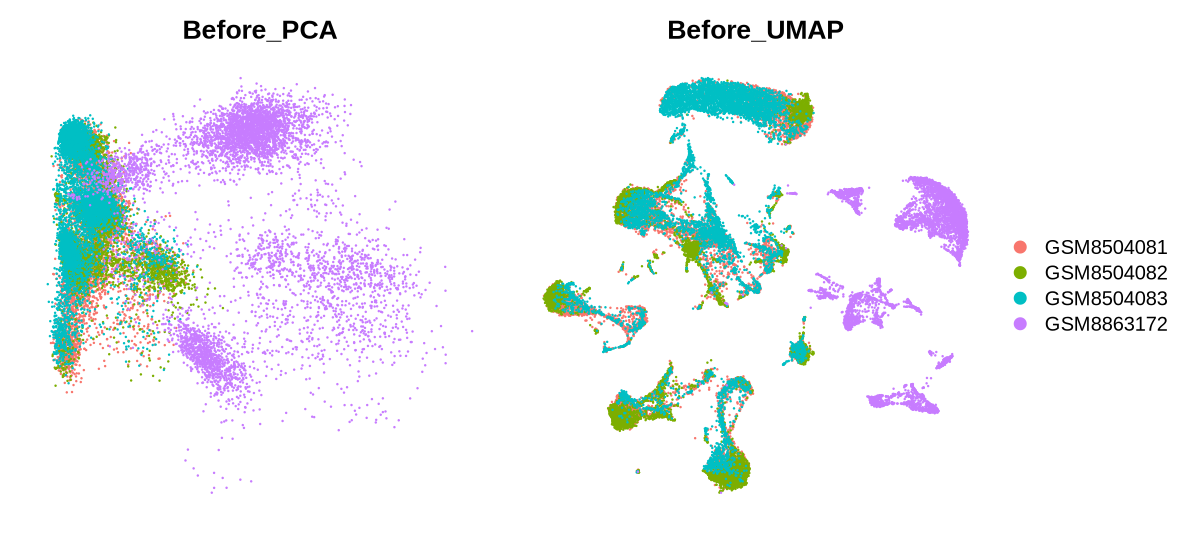

In [16]:
### 3.2 检查批次
options(repr.plot.width = 10, repr.plot.height = 4.5)
p1.compare=wrap_plots(ncol = 2,
                      DimPlot(seurat.data, reduction = "pca", group.by = "sampleID")+NoAxes()+ggtitle("Before_PCA"),
                      DimPlot(seurat.data, reduction = "umap", group.by = "sampleID")+NoAxes()+ggtitle("Before_UMAP"),
                      guides = "collect"
)
p1.compare

Loading required package: Rcpp

Transposing data matrix

Initializing state using k-means centroids initialization



Harmony 1/10

Harmony 2/10

Harmony 3/10

Harmony 4/10

Harmony 5/10

Harmony 6/10

Harmony 7/10

Harmony 8/10

Harmony 9/10

Harmony 10/10



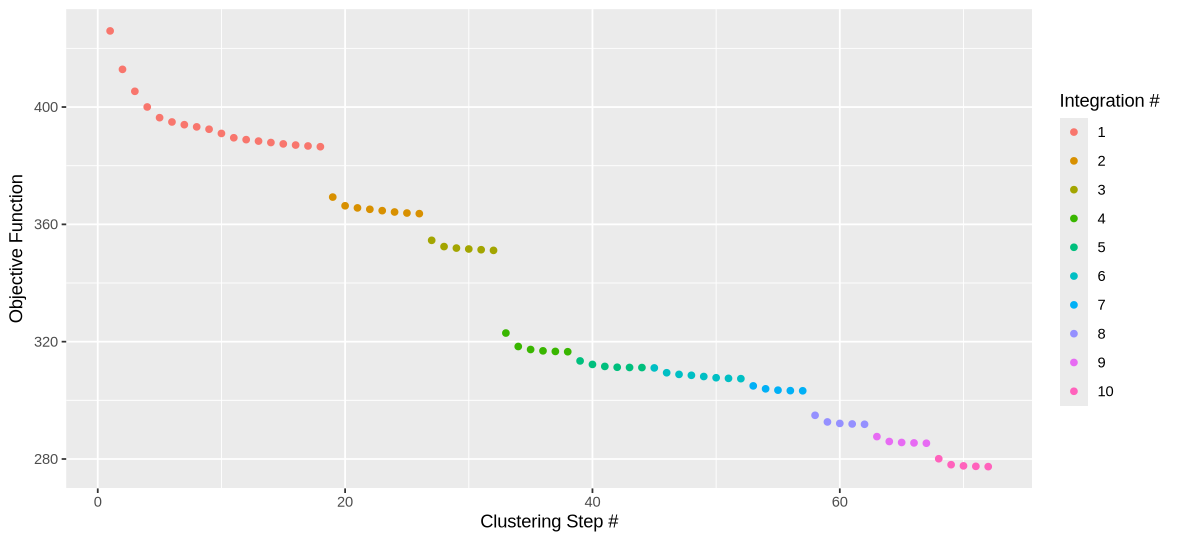

In [17]:
### 4.1 RunHarmony 小样本运行比较快
library(harmony)
seurat.data <- seurat.data %>% RunHarmony("sampleID", plot_convergence = T)

In [18]:
### 去批次之后，还需要再RunUMAP一次更新harmony
seurat.data <- seurat.data %>% 
  RunUMAP(reduction = "harmony", dims = 1:pcSelect, verbose = F)

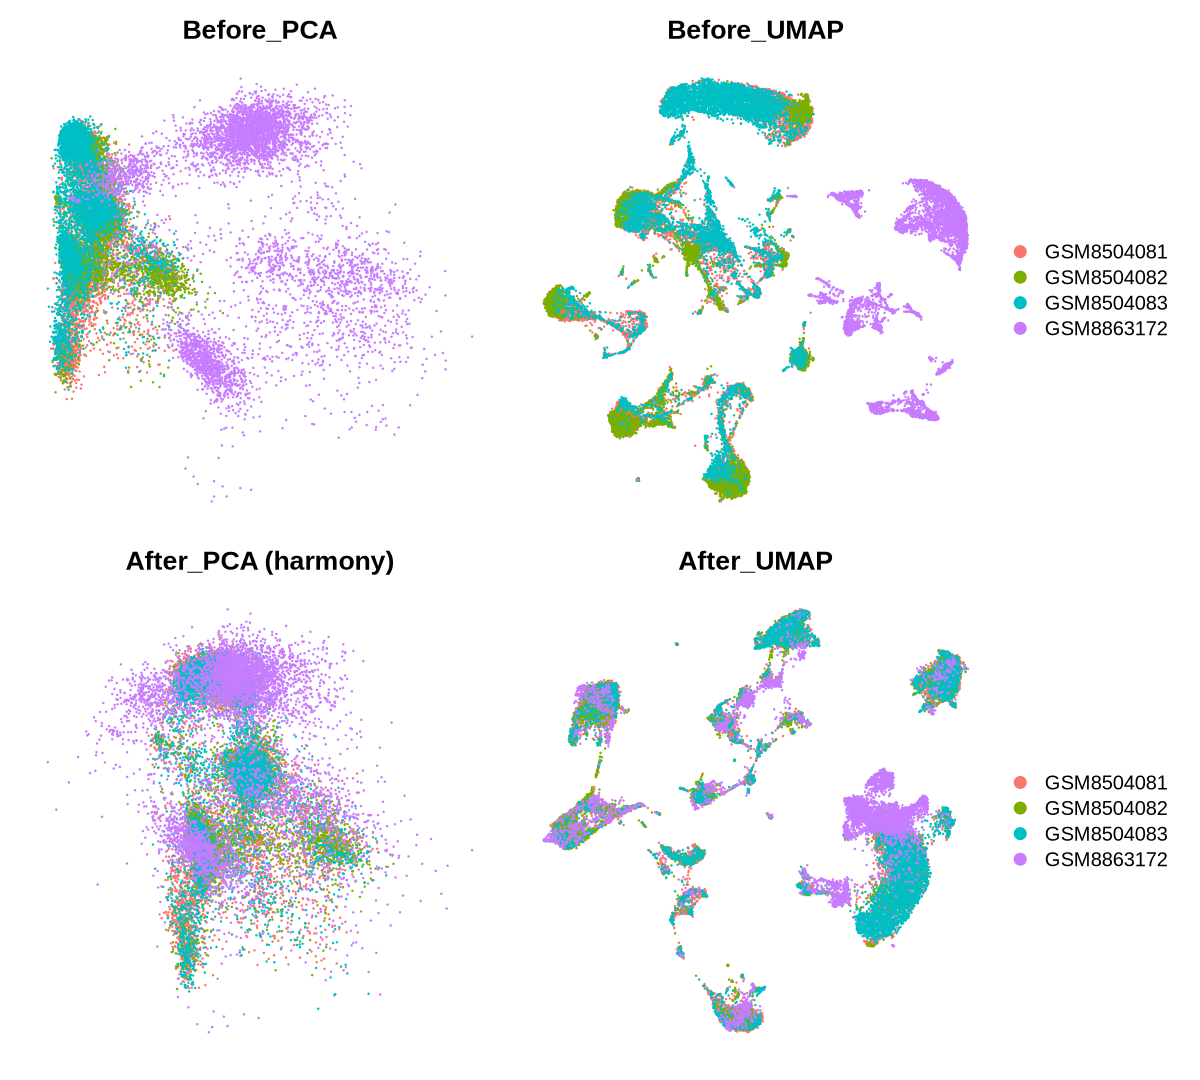

In [19]:
p2.compare=wrap_plots(ncol = 2,
                      DimPlot(seurat.data, reduction = "harmony", group.by = "sampleID")+NoAxes()+ggtitle("After_PCA (harmony)"),
                      DimPlot(seurat.data, reduction = "umap", group.by = "sampleID")+NoAxes()+ggtitle("After_UMAP"),
                      guides = "collect"
)
# p2.compare

options(repr.plot.width = 10, repr.plot.height = 9)
wrap_plots(p1.compare, p2.compare, ncol = 1)


In [20]:
pdf(file="after_hamrmony.pdf",width=10,height=9)
wrap_plots(p1.compare, p2.compare, ncol = 1)
dev.off()

agg_record_2142294135 
                    2

### 找合适的resolution

In [21]:
# 对比多种resolution的聚类结果
seurat.data <- FindNeighbors(seurat.data,reduction = "harmony", dims = 1:pcSelect)
for (res in c(0.05,0.1,0.2,0.3,0.5,0.8,1,1.2,1.4,1.5,2)){
  print(res)
  seurat.data <- FindClusters(seurat.data,resolution = res, algorithm = 1)
}

Computing nearest neighbor graph



Computing SNN



[1] 0.05
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 27069
Number of edges: 1001301

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9881
Number of communities: 11
Elapsed time: 4 seconds
[1] 0.1
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 27069
Number of edges: 1001301

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9811
Number of communities: 14
Elapsed time: 4 seconds
[1] 0.2
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 27069
Number of edges: 1001301

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9705
Number of communities: 18
Elapsed time: 5 seconds
[1] 0.3
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 27069
Number of edges: 1001301

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9614
Number of communities: 20

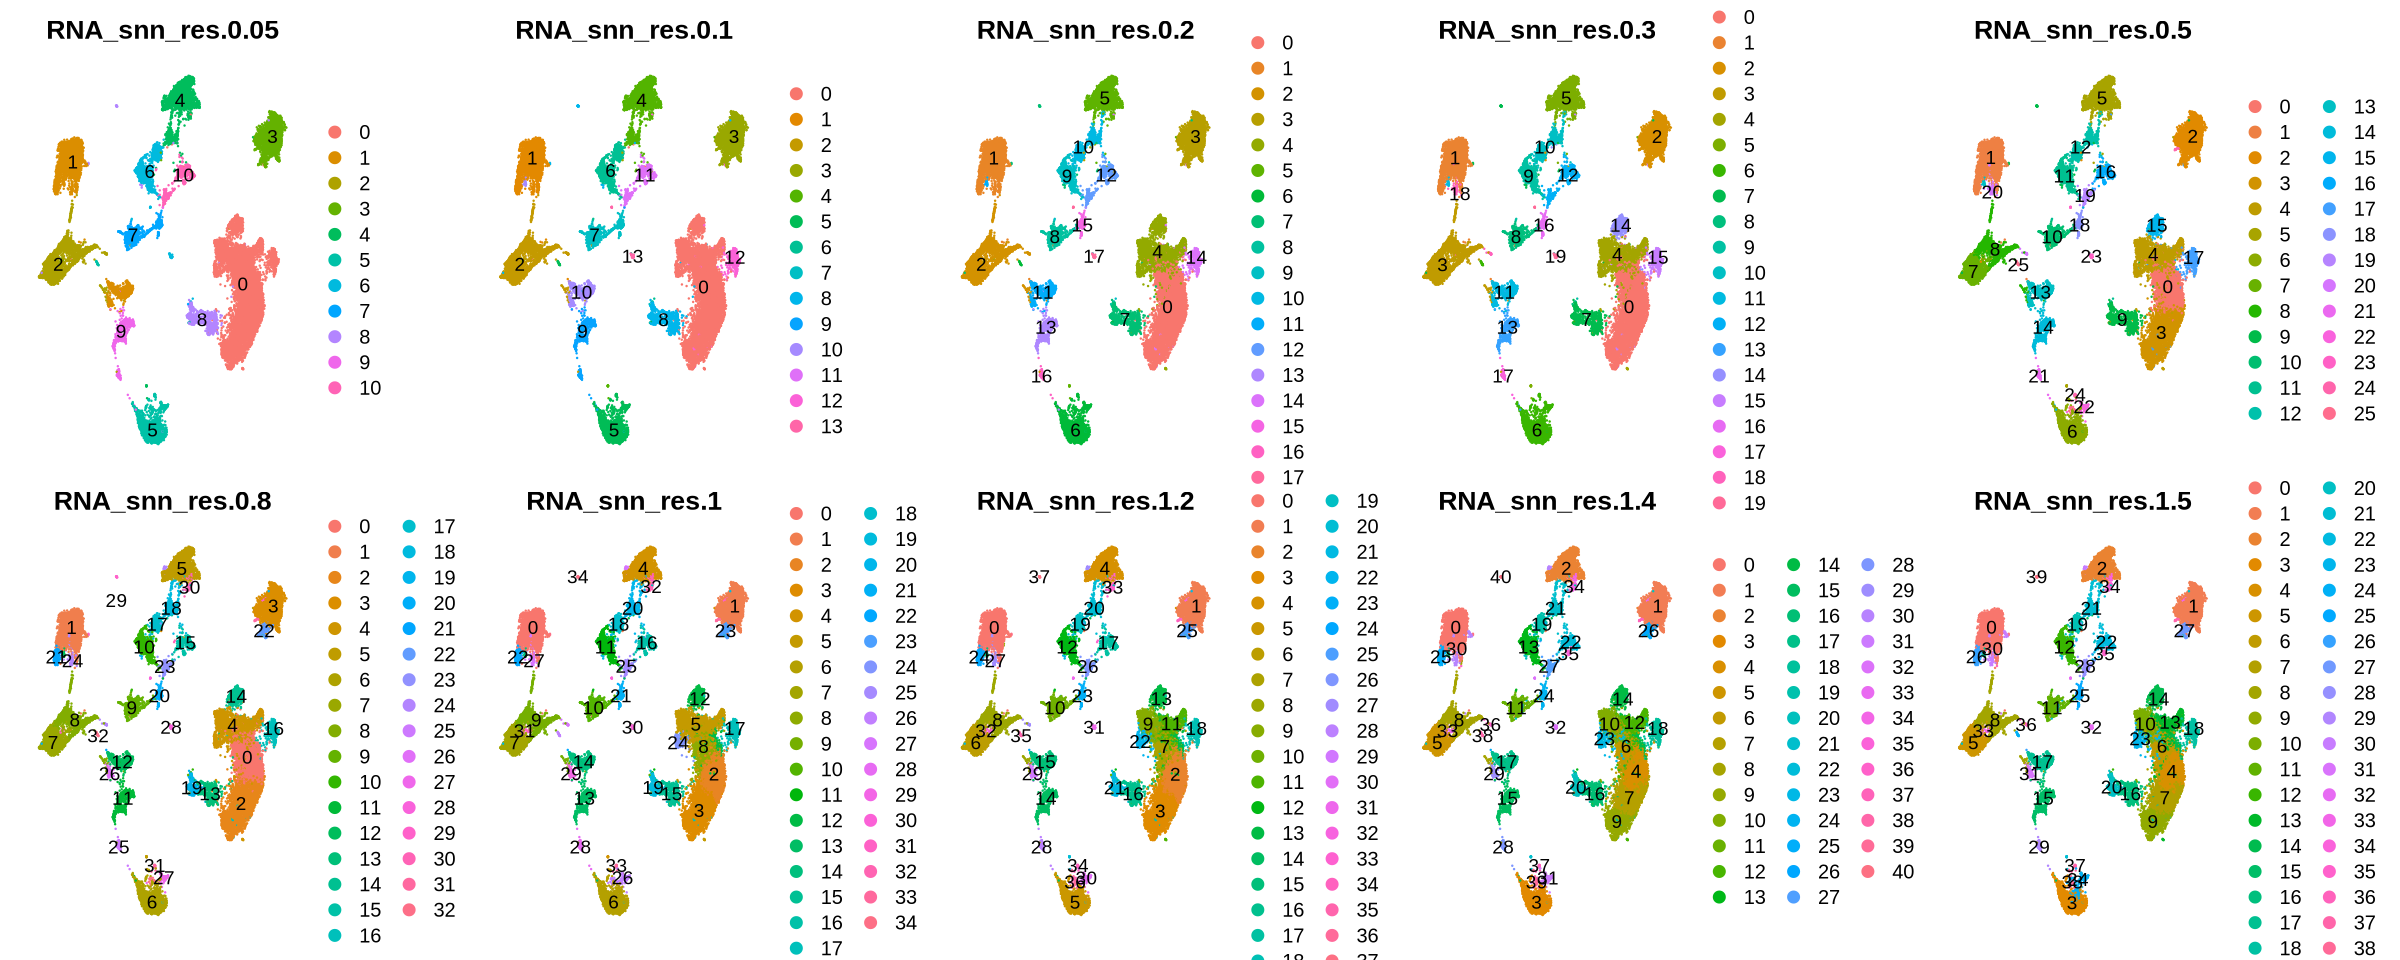

In [22]:
options(repr.plot.width = 20, repr.plot.height = 8)
#umap可视化
cluster_umap <- wrap_plots(ncol = 5,
                           DimPlot(seurat.data, reduction = "umap", group.by = "RNA_snn_res.0.05", label = T) & NoAxes(),  
                           DimPlot(seurat.data, reduction = "umap", group.by = "RNA_snn_res.0.1", label = T) & NoAxes(),
                           DimPlot(seurat.data, reduction = "umap", group.by = "RNA_snn_res.0.2", label = T) & NoAxes(),
                           DimPlot(seurat.data, reduction = "umap", group.by = "RNA_snn_res.0.3", label = T)& NoAxes(),
                           DimPlot(seurat.data, reduction = "umap", group.by = "RNA_snn_res.0.5", label = T) & NoAxes(),
                           DimPlot(seurat.data, reduction = "umap", group.by = "RNA_snn_res.0.8", label = T) & NoAxes(), 
                           DimPlot(seurat.data, reduction = "umap", group.by = "RNA_snn_res.1", label = T) & NoAxes(),
                           DimPlot(seurat.data, reduction = "umap", group.by = "RNA_snn_res.1.2", label = T) & NoAxes(),
                           DimPlot(seurat.data, reduction = "umap", group.by = "RNA_snn_res.1.4", label = T)& NoAxes(),
                           DimPlot(seurat.data, reduction = "umap", group.by = "RNA_snn_res.1.5", label = T)& NoAxes()
)
cluster_umap

In [42]:
Idents(seurat.data) <- seurat.data@meta.data$celltype

In [48]:
pdf(file="07.Umap_immune_celltype.pdf",width=6.5,height=6)
# 默认用seurat_clusters列（最后一次聚类得到的列）
DimPlot(seurat.data, reduction = "umap", label = TRUE) & NoAxes()
dev.off()

agg_record_1382030438 
                    2

In [25]:
#qs速度快
#install.packages('qs')
library(qs)
system.time({
    qsave(seurat.data,file = "./Outdata/Cluster_no_annotion.qs") 
})

   user  system elapsed 
 11.138   0.971  12.144 

### 主要细胞类型注释

In [2]:
# 读取未注释的数据
seurat.data = qread(file = "./Outdata/Cluster_no_annotion.qs")

In [3]:
table(seurat.data@meta.data$celltype)


            B cells          Macrophage         Neutrophils            NK cells 
               2645                7239                8215                3641 
Other Myeloid cells             T cells 
               2434                2895 

In [66]:
# # 将 RNA 表达矩阵的基因名称转换为大写
# rownames(seurat.data@assays$RNA@counts) = toupper(rownames(seurat.data@assays$RNA@counts))
# rownames(seurat.data@assays$RNA@data) = toupper(rownames(seurat.data@assays$RNA@data))

## 免疫细胞细分的marker基因（ChatGPT）

Warning message:
“The following requested variables were not found: Ly6c, B220, Cd11b”


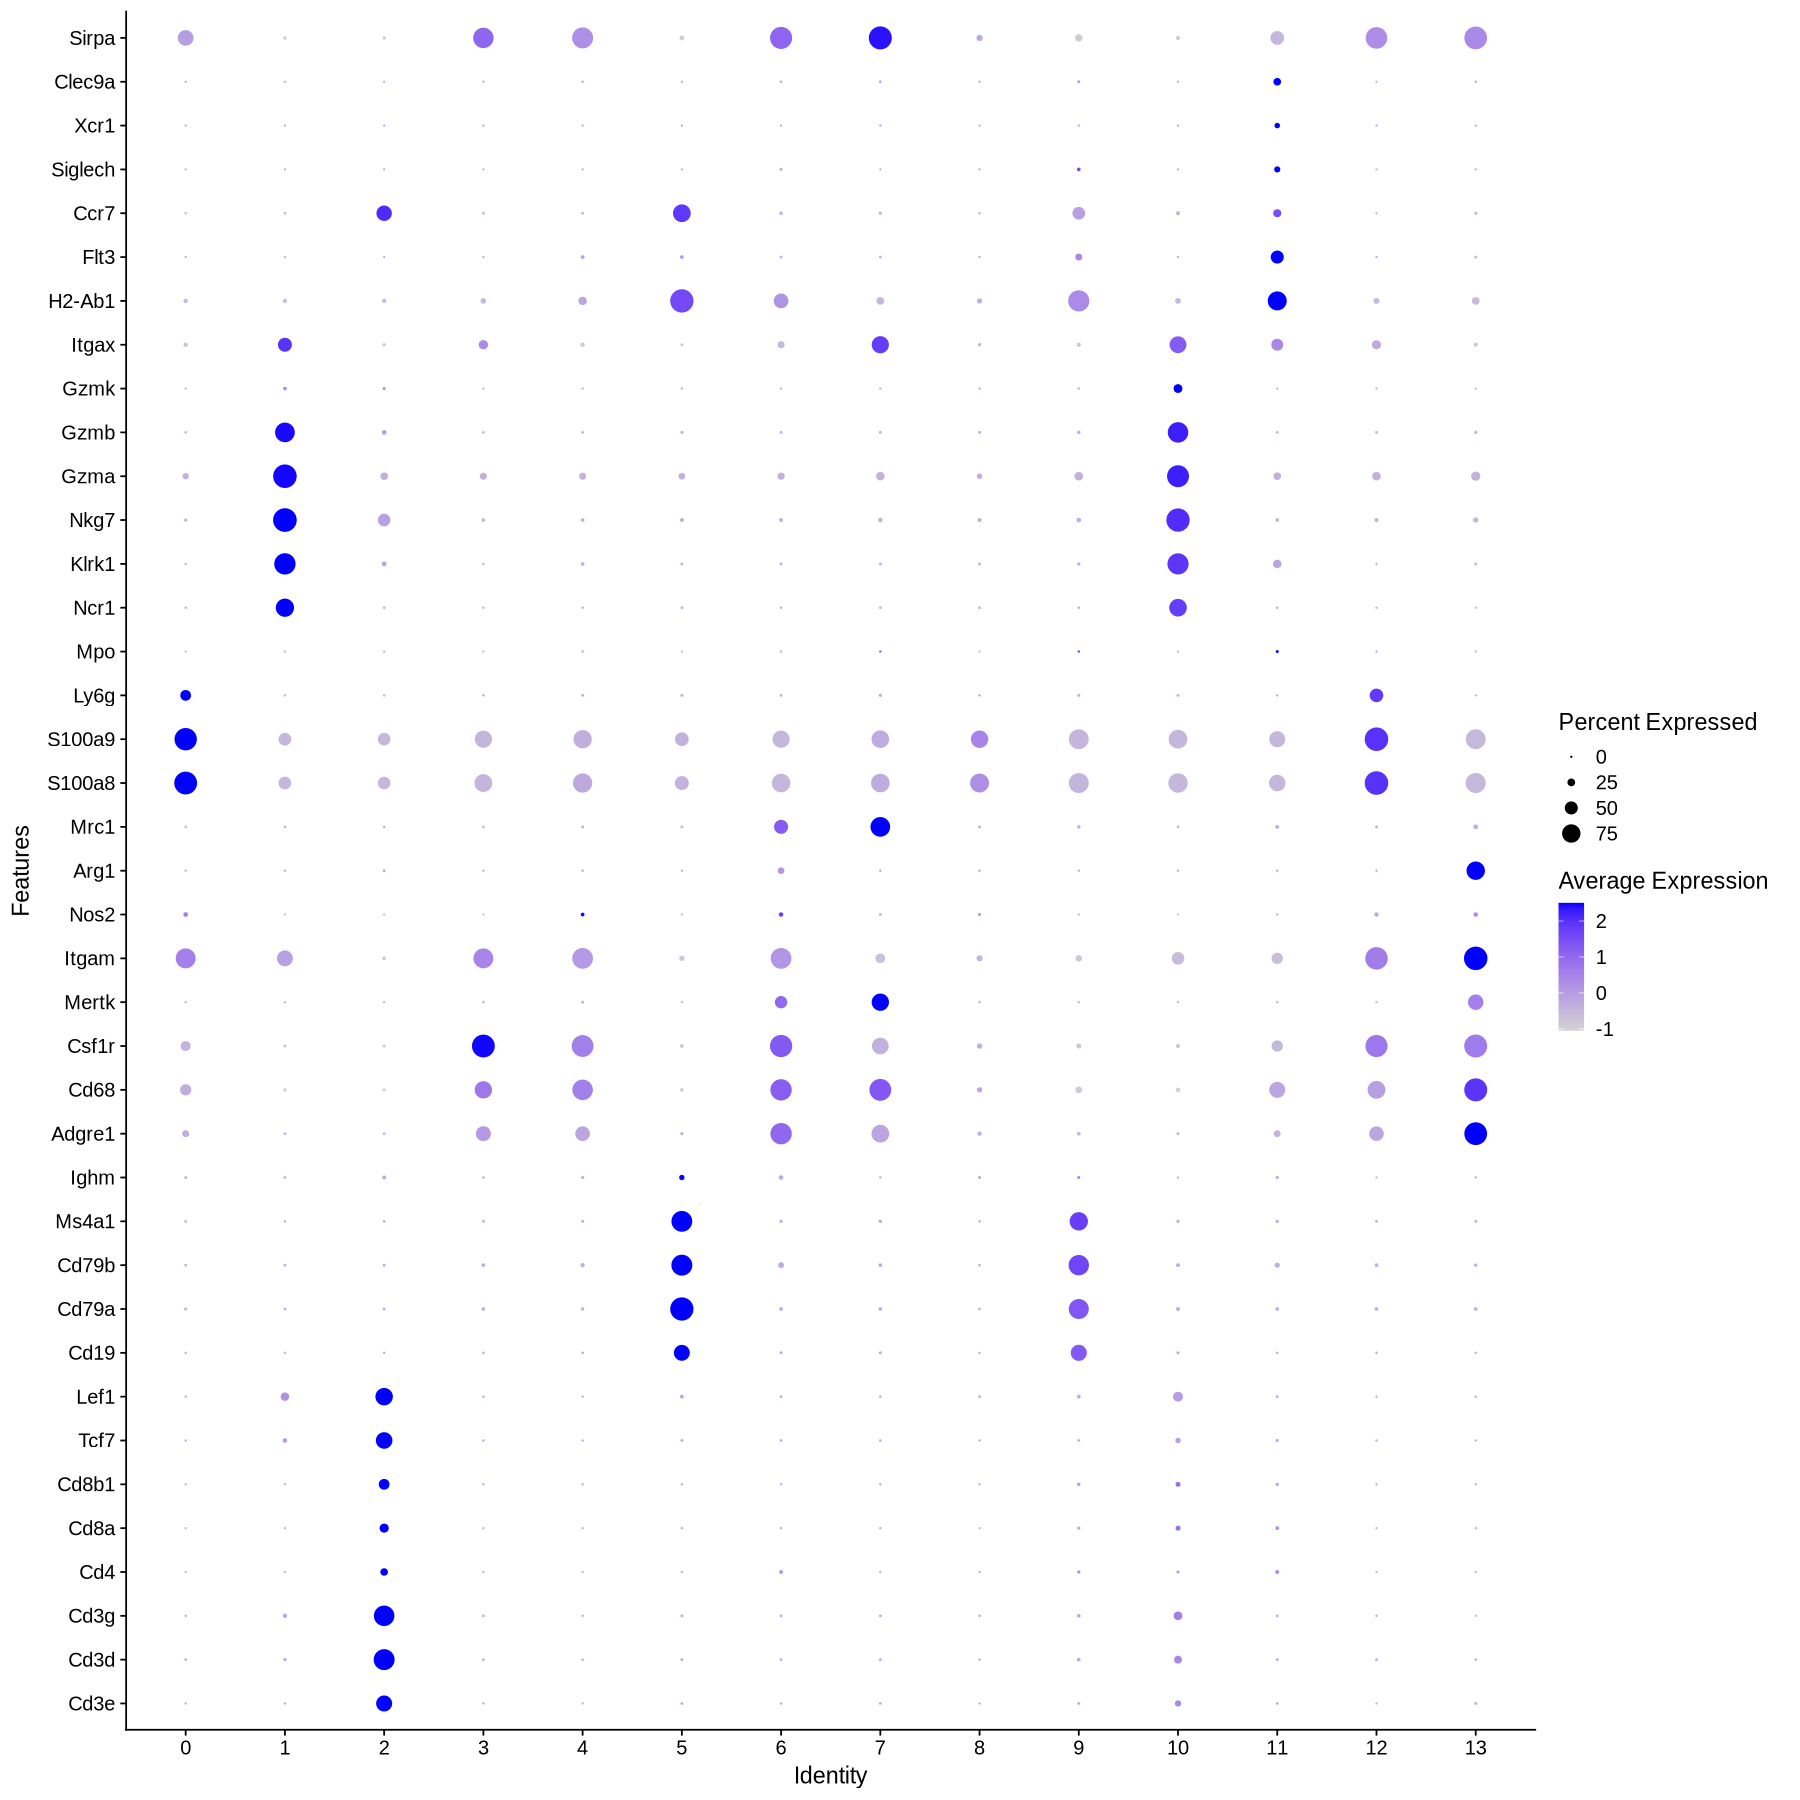

In [10]:
check_genes <- c(
  # T cells
  "Cd3e", "Cd3d", "Cd3g", "Cd4", "Cd8a", "Cd8b1", "Tcf7", "Lef1",
  # B cells
  "Cd19", "Cd79a", "Cd79b", "Ms4a1", "Ighm",
  # Macrophages
  "Adgre1", "Cd68", "Csf1r", "Mertk", "Itgam", "Nos2", "Arg1", "Mrc1",
  # Neutrophils
  "S100a8", "S100a9", "Ly6g", "Ly6c", "Mpo",
  # NK cells
  "Ncr1", "Klrk1", "Nkg7", "Gzma", "Gzmb",
  # Gzmk+ NK cells
  "Gzmk",
  # Dendritic cells (DC)
  "Itgax", "H2-Ab1", "Flt3", "Ccr7", "Siglech", "B220", "Xcr1", "Clec9a", "Sirpa", "Cd11b"
)

# 默认seurat_clusters列为RNA_snn_res.0.2
Idents(seurat.data) <- seurat.data@meta.data$RNA_snn_res.0.1

options(repr.plot.width = 15, repr.plot.height = 15)

DotPlot(object = seurat.data, features = check_genes, 
        assay = "RNA",scale = T) + coord_flip()

In [ ]:
sss

Warning message:
“The following requested variables were not found: Clec4c, Fcgr3b, Gnly, Cd8b, Cd8”


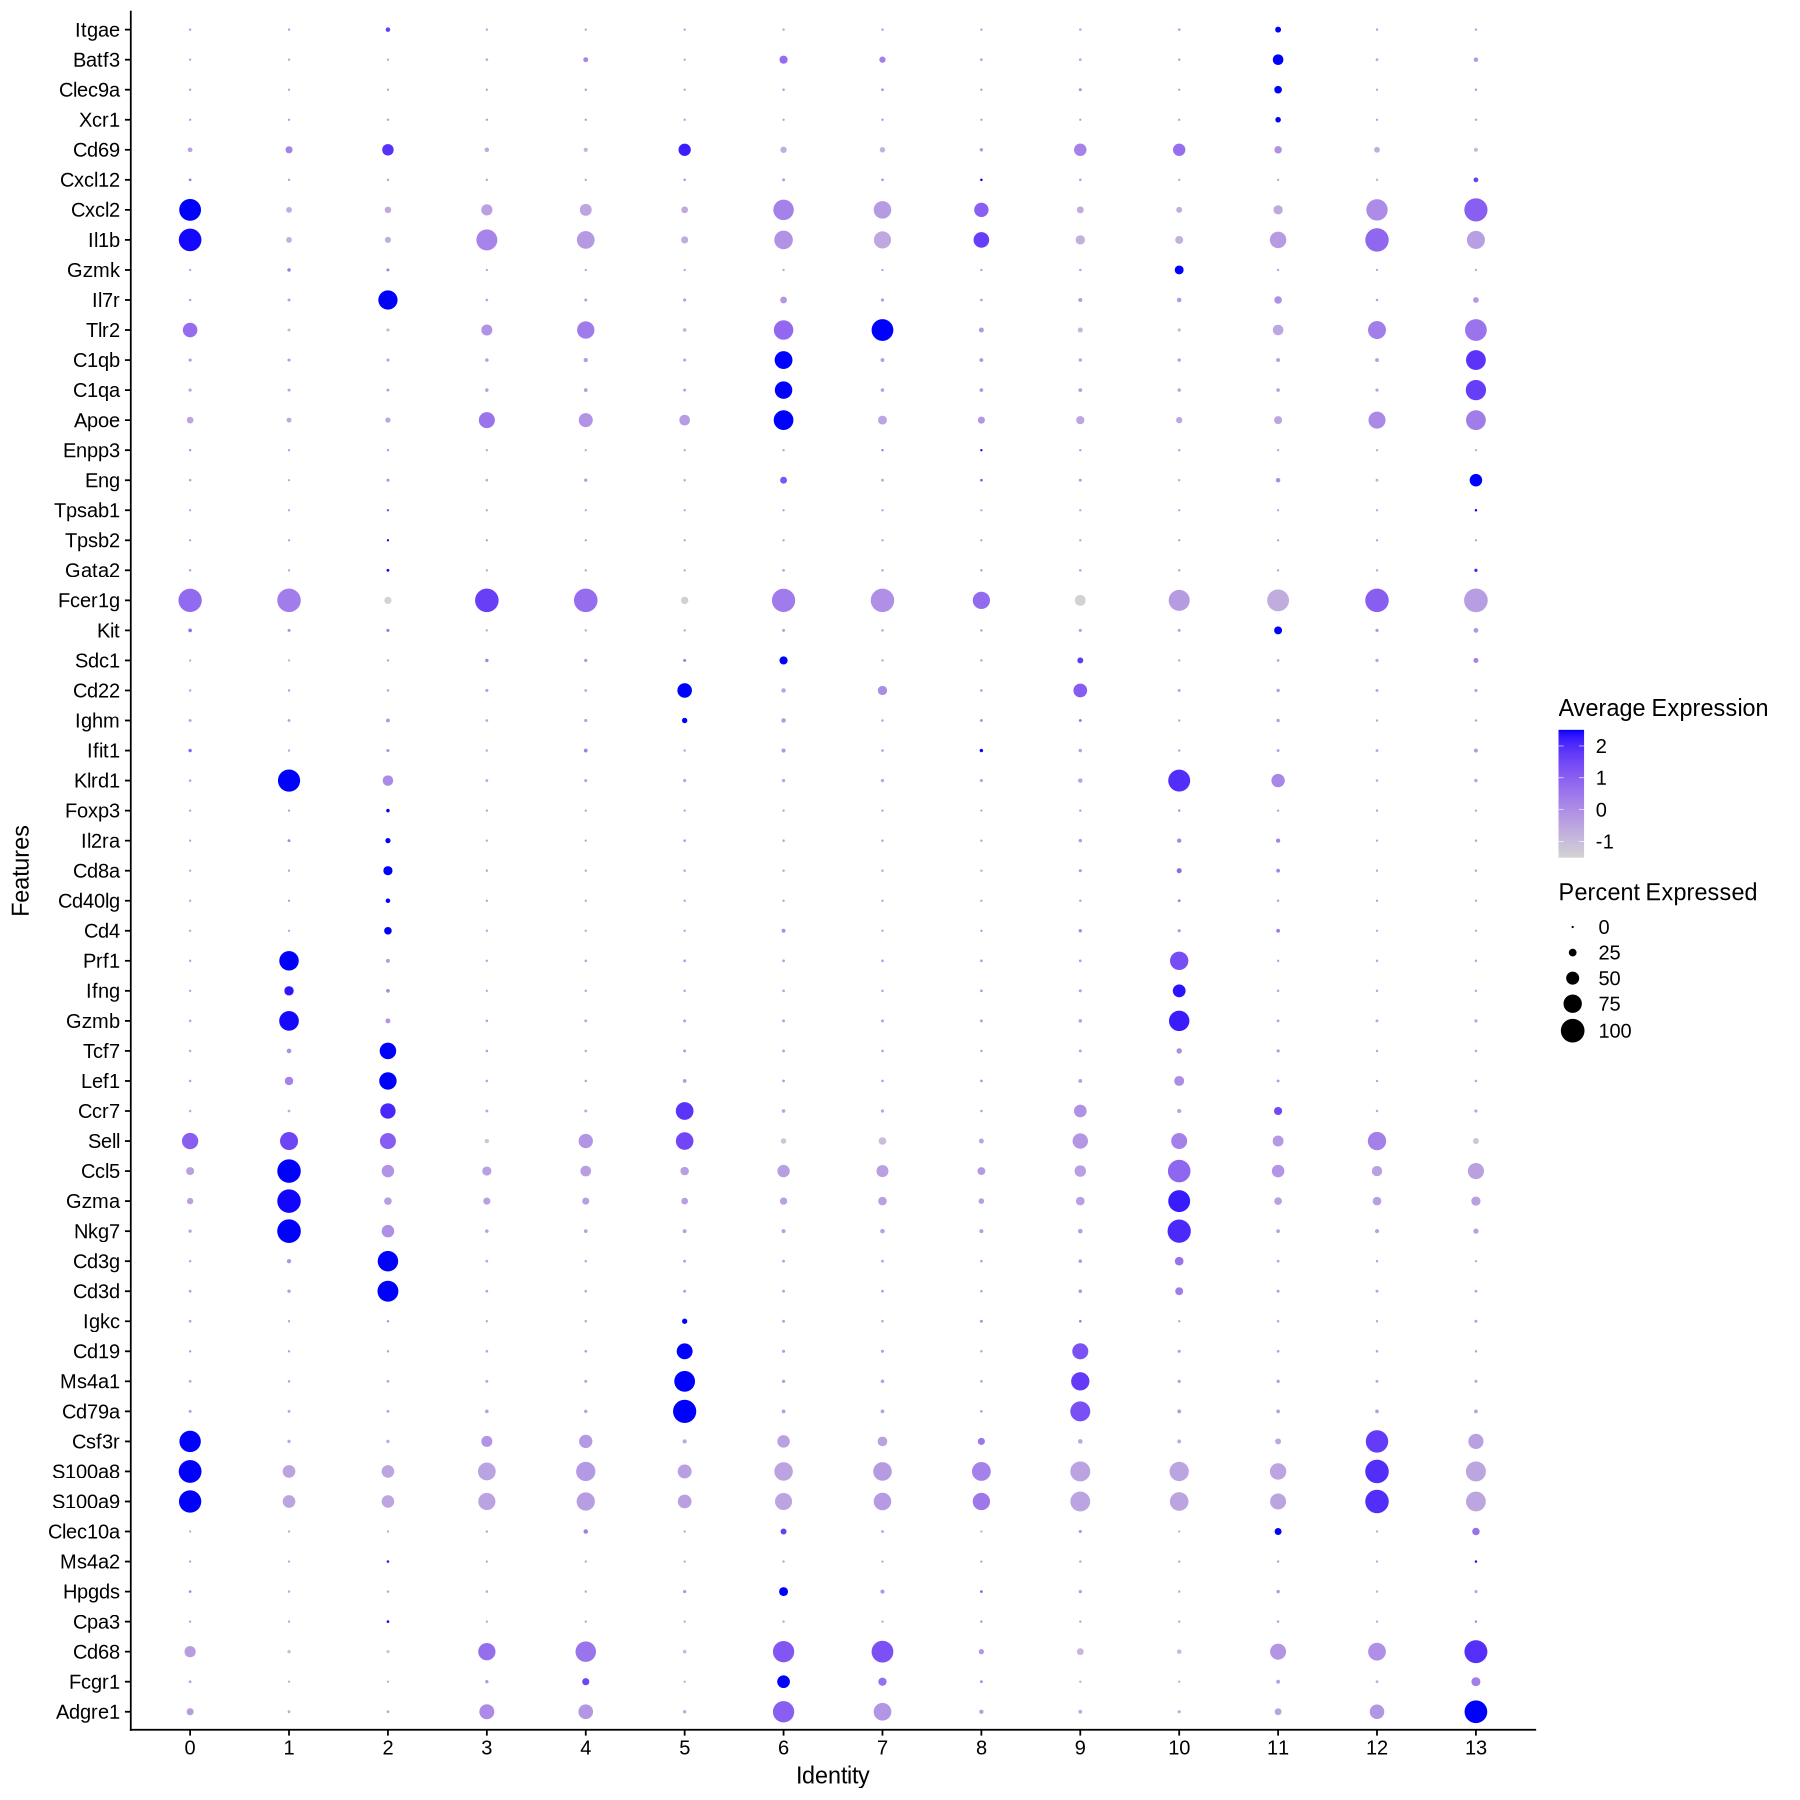

In [67]:
### 基因名称区分大小写，需要有assay中的基因名称大小写一直

# 默认seurat_clusters列为RNA_snn_res.0.2
Idents(seurat.data) <- seurat.data@meta.data$RNA_snn_res.0.1

options(repr.plot.width = 15, repr.plot.height = 15)

# 合并以上两者
check_genes = c(
                "Adgre1","Fcgr1","Cd68", # 巨噬细胞
                "Cpa3","Hpgds","Ms4a2", # 肥大细胞
                "Clec10a","Clec4c", #DC cells
                # "Retnlg","Cd14",   # "Fcer1g",髓系细胞 (Myeloid_cells)  需要进一步细分巨噬细胞、中性粒细胞
                # "Col1a1","Col1a2","Dcn",# 成纤维细胞 Fibroblast
                # "Epcam","Cdh1","Krt18",   # 上皮细胞 (Epithelial cells)
                # "Tnni3", "Mb", "Myl3", # 心肌细胞
                "S100a9", "S100a8",'Csf3r',"Fcgr3b", #"Mki67", #中性粒细胞
                "Cd79a", "Ms4a1","Cd19","Igkc", #B细胞
                # "Acta2", "Myh11", #平滑肌细胞 Smooth muscle cells
                "Cd3d","Cd3g", #T 细胞
                "Nkg7","Gzma","Ccl5",   # NK细胞 (NK_cells)
                # "Rgs5","Kcnj8", #周细胞
                # "Kcna2","Ank3","Chl1", #神经元
                # "Ppbp","Gp1bb", # Platelets
                # 'Mki67','Top2a', #Cell cycling
                
                # "Cldn5","Pecam1","Ramp2"   # 内皮细胞 (Endothelial cells)
                

                # 'Cd3e',"Cd2",'Trac','Il32', #T cells
                'Sell',"Ccr7","Lef1","Tcf7", #Naive
                "Gzmb","Ifng","Prf1","Gnly", 
                'Cd4','Cd40lg','Cd8a','Cd8b','Il2ra','Foxp3',#Effect/cytotoxic
                "Klrd1","Ifit1", #NK cells
                "Ighm","Cd22","Sdc1", #B cells
                "Kit","Fcer1g","Gata2",'Tpsb2','Tpsab1','Eng','Enpp3', #Mast cells
                "Apoe","C1qa",'C1qb',#Macrophages

                "Tlr2","Il7r","Gzmk","Il1b","Cxcl2","Cxcl12","Cd69","Cd8",
                "Xcr1", "Clec9a", "Batf3", "Itgae" # DC cells
)


DotPlot(object = seurat.data, features = check_genes, 
        assay = "RNA",scale = T) + coord_flip()

In [70]:
check_genes = c(
                "Adgre1","Fcgr1","Cd68", # 巨噬细胞
                # "Cpa3","Hpgds","Ms4a2", # 肥大细胞
                # "Clec10a","Clec4c", #DC cells
                "Retnlg","Fcer1g","Cd14",   # 髓系细胞 (Myeloid_cells)  需要进一步细分巨噬细胞、中性粒细胞
                "Col1a1","Col1a2","Dcn",# 成纤维细胞 Fibroblast
                "Epcam","Cdh1","Krt18",   # 上皮细胞 (Epithelial cells)
                # "Tnni3", "Mb", "Myl3", # 心肌细胞
                "S100a9", "S100a8",'Csf3r', #"Mki67", #中性粒细胞 Neutrophils
                "Cd79a", "Ms4a1","Cd19","Igkc", #B细胞
                "Acta2", "Myh11", #平滑肌细胞 Smooth muscle cells
                "Cd3d","Cd3g", #T细胞
                "Nkg7","Gzma","Ccl5",   # NK细胞 (NK_cells)
                # "Rgs5","Kcnj8", #周细胞
                # "Kcna2","Ank3","Chl1", #神经元
                "Ppbp","Gp1bb", # Platelets
                'Mki67','Top2a', #Cell cycling
                
                "Cldn5","Pecam1","Ramp2"   # 内皮细胞 (Endothelial cells)
)

###分配细胞名称
celltype=data.frame(ClusterID=0:13,celltype='NA')

## Neutrophils
celltype[celltype$ClusterID %in% c(0,8,12),2]='Neutrophils' #CRL

## Macrophage
celltype[celltype$ClusterID %in% c(3,4,6,7,13),2]='Macrophage' #CRL

# Myeloid_cells
celltype[celltype$ClusterID %in% c(11),2]='DC cells' #CRL


## B_cells
celltype[celltype$ClusterID %in% c(5,9),2]='B cells' # B


## T_cells
celltype[celltype$ClusterID %in% c(2),2]='T cells'  #CRL

## NK_cells
celltype[celltype$ClusterID %in% c(1),2]='NK cells'  #CRL

## NK_cells
celltype[celltype$ClusterID %in% c(10),2]='Gzmk+ NK cells'  #CRL




colnames(celltype) = c("ClusterID","celltype_main")
seurat.data@meta.data$celltype = "NA"
for(i in 1:nrow(celltype)){
  seurat.data@meta.data[which(seurat.data@active.ident == celltype$ClusterID[i]),'celltype'] <- celltype$celltype[i]}
table(seurat.data@meta.data$celltype)


       B cells       DC cells Gzmk+ NK cells     Macrophage    Neutrophils 
          2747            629            686           7644           9648 
      NK cells        T cells 
          2914           2801 

### 其他细胞类型注释

In [ ]:
# options(repr.plot.width = 15, repr.plot.height = 8)
# ## 红细胞和增殖细胞
# check_genes = c("Hbb","Hba1","Hba2", # 红细胞,Erythroid cells
#                 "Ppbp","Gp1bb", # Platelets
#                 'Mki67','Top2a' #Cell cycling
# )
# DotPlot(object = seurat.data, features = check_genes, 
#         assay = "RNA",scale = T) + coord_flip()


# options(repr.plot.width = 15, repr.plot.height = 8)
# check_genes = c("Rgs1","Ptprc",'Tyrobp', #Leukocytes (Leu) 
#                 'Cd3d','Cd3e',"Cd3g","Cd2",'Trac','Il32', #T cells
#                 'Sell',"Ccr7","Lef1","Tcf7",'Il7r', #Naive
#                  "Gzma", "Gzmb","Ifng","Prf1","Gnly", #Effect/cytotoxic
#                 'Cd4','Cd40lg','Cd8a','Cd8b','Il2ra','Foxp3',
#                 "Nkg7","Klrd1","Ifit1", #NK cells
#                 "Ighm","Cd22","Cd79a","Cd19","Ms4a1","Sdc1", #B cells
#                 "Jchain","Mzb1","Prdm1","Igj" #Plasma cells
# )
# DotPlot(object = seurat.data, features = check_genes,assay = "RNA",scale = T) + 
#     coord_flip()


# options(repr.plot.width = 15, repr.plot.height = 8)
# check_genes = c("Rgs1","Ptprc",'Tyrobp', #Leukocytes (Leu) 
#                 'Cd3d','Cd3e',"Nkg7",
#                 'Cd68',"Hla-dqb1","Hla-drb1", #MNP,mononuclear phagocytes
#                 "Apoe","C1qa",'C1qb',#Macrophages
#                 "Itgax","Cd14","Fcgr3a","S100a8","Mmp19",#Monocyte 
#                 "Clec10a","Clec4c", #DC cells
#                 "Irf8","Clec9a", "Flt3",#C10_cCD1_CLEC9A IDO1+
#                 "Cd1e","Cd1c","Fcgr1a","Sirpa", "Mafb", #C6_cCD2_CD1C
#                 "Ccr7","Lamp3","Fscn1", "Ido1","Ido2", #DC3 #C11_cDC3_LAMP3
#                 "Lilra4", "Slc32a1","Shd","Lrrc26","Pacsin1","Il3ra", #pDCs C9_pDC_LILRA4 GZMB+
#                 "Kit","Fcer1g","Gata2",'Tpsb2','Ms4a2','Tpsab1','Eng','Enpp3', #Mast cells
#                 "Csf3r","S100a9","Fcgr3b","Alpl","Cxcr1",#Neutrophils
#                 "Olr1","Ldha","Il1rn","Cd44", #PMN-MDSC
#                 "Cxcr2","Adgrg3","Cmtm2","Prok2","Mme","Mmp25",
#                 "Tnfrsf10c","Ceacam8" #Neutrophils
# )
# DotPlot(object = seurat.data, features = check_genes,assay = "RNA",scale = T) + 
#     coord_flip()


# options(repr.plot.width = 15, repr.plot.height = 8)
# check_genes = c("Ackr1",'Cldn5',"Pecam1","Igfbp7",'Sele','Hmox1','Rgs1','Cd200','Vwf','Eng','Cdh5', #Endothelia
#                   "Mt1a","Myh11",#Myofibroblast and Smooth muscle
#                   "Tpm2",'Myl9','Egfl7','Pln', #Smooth muscle (SM)
#                   "Gem","Gja4",#Myofibroblast
#                   "Dcn","Apod","Vim","Lum",'Fbln1','Ptgds','Cfd','Sri','Tagln2','Dpt','Tnfaip6', #Fibroblas (Fib)
#                   'Acta2', #Fibroblas (Fib) & Smooth muscle (SM)
#                   "Rgs5","Notch3","Pdgfrb","Thy1","Ndufa4l2",  #pericytes
#                  "Myl1","Mylpf","Myog","Myf5","Myod1","Des","Pax7", #myoblasts
#                 'Epcam',#Epithelial
#                 "Krt4", "Krt13"
#   )	
# DotPlot(object = seurat.data, features = check_genes,assay = "RNA",scale = T) + 
#     coord_flip()


In [74]:
pdf(file="09.Umap_annotion_immune.pdf",width=12,height=10)
DimPlot(seurat.data, reduction = "umap", group.by = "celltype", label = T)& NoAxes()
dev.off()

agg_record_936626738 
                   2

In [72]:
head(seurat.data@meta.data)
Idents(seurat.data) <- seurat.data@meta.data$celltype
table(seurat.data@meta.data$celltype)

,orig.ident,nCount_RNA,nFeature_RNA,sampleID,group,percent.mt,RNA_snn_res.0.05,seurat_clusters,RNA_snn_res.0.1,RNA_snn_res.0.2,⋯,RNA_snn_res.0.5,RNA_snn_res.0.8,RNA_snn_res.1,RNA_snn_res.1.2,RNA_snn_res.1.4,RNA_snn_res.1.5,RNA_snn_res.2,celltype,immune,celltype_immune
,<chr>,<dbl>,<int>,<chr>,<chr>,<dbl>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<chr>,<chr>,<chr>
GSM8504081_AAACCCAAGGCATCAG-1,GSM8504081,5907,1602,GSM8504081,ALI,3.741324,2,19,2,2,⋯,8,8,9,8,8,8,19,T cells,Immune cells,NA
GSM8504081_AAACCCACAGGCAATG-1,GSM8504081,19694,4135,GSM8504081,ALI,4.691784,6,12,6,9,⋯,11,10,11,12,13,12,12,Macrophage,Immune cells,NA
GSM8504081_AAACCCAGTCGAATTC-1,GSM8504081,7257,2038,GSM8504081,ALI,4.533554,5,5,5,6,⋯,6,6,6,5,3,3,5,B cells,Immune cells,NA
GSM8504081_AAACCCATCAATGCAC-1,GSM8504081,3922,1628,GSM8504081,ALI,2.855686,3,3,3,3,⋯,2,3,1,1,1,1,3,Macrophage,Immune cells,NA
GSM8504081_AAACCCATCCGTGGCA-1,GSM8504081,12166,3079,GSM8504081,ALI,4.257768,5,39,5,6,⋯,24,31,33,34,37,37,39,B cells,Immune cells,NA
GSM8504081_AAACCCATCCTAACAG-1,GSM8504081,5134,1730,GSM8504081,ALI,4.285158,2,4,2,2,⋯,7,7,7,6,5,5,4,T cells,Immune cells,NA



       B cells       DC cells Gzmk+ NK cells     Macrophage    Neutrophils 
          2747            629            686           7644           9648 
      NK cells        T cells 
          2914           2801 

In [73]:
## 2.5 保存数据
qsave(seurat.data, file = "./Outdata/Step3.Cluster_annotion.qs")

## 免疫细胞中特定基因得分布情况

In [1]:
library(Seurat)
library(dplyr)
library(patchwork)
# library(readr)
library(ggplot2)
#有云服务器的，可开启并运算，这里我用4个线程：
library(future)
library(qs)
# check the current active plan
plan()
# change the current plan to access parallelization
plan("multisession", workers =40)
plan()

#设置可用的内存
# options(future.globals.maxSize = 4 * 1024^3)
plan("sequential")
future::plan()

Attaching SeuratObject

‘SeuratObject’ was built with package ‘Matrix’ 1.7.3 but the current
version is 1.7.4; it is recomended that you reinstall ‘SeuratObject’ as
the ABI for ‘Matrix’ may have changed

Seurat v4 was just loaded with SeuratObject v5; disabling v5 assays and
validation routines, and ensuring assays work in strict v3/v4
compatibility mode


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


qs 0.27.3. Announcement: https://github.com/qsbase/qs/issues/103



sequential:
- args: function (..., envir = parent.frame(), workers = "<NULL>")
- tweaked: FALSE
- call: plan(sequential)
FutureBackend to be launched

multisession:
- args: function (..., workers = 40)
- tweaked: TRUE
- call: plan("multisession", workers = 40)
MultisessionFutureBackend:
Inherits: ClusterFutureBackend, MultiprocessFutureBackend, FutureBackend
UUID: a6e1eff6dfa86da7b6110a1bc53bf858
Number of workers: 40
Number of free workers: 40
Available cores: 80
Automatic garbage collection: FALSE
Early signaling: FALSE
Interrupts are enabled: TRUE
Maximum total size of globals: +Inf
Maximum total size of value: +Inf
Argument ‘rscript_libs’: "/home/guoliming/micromamba/envs/R4.4.3/lib/R/library"
Argument ‘persistent’: FALSE
Argument ‘wait.timeout’: 86400
Argument ‘wait.interval’: 0.01
Argument ‘wait.alpha’: 1.01
Argument ‘hooks’: FALSE
Number of active futures: 0
Number of futures since start: 0 (0 created, 0 launched, 0 finished)
Total runtime of futures: 0 secs (NaN secs/finished future)
Workers of type RichSOCKcluster:
- Summary: Socket cluster with 40 nodes on host ‘localhost’ (R version 4.4.3 (2025-02-28), platform x86_64-conda-linux-gnu)
- [ OK ] Node 1/40: valid connection, alive [RichSOCKnode of a socket cluster on local host 'localhost' with pid 18887 (R version 4.4.3 (2025-02-28), x86_64-conda-linux-gnu) using socket connection #5 ('<-localhost:11587')]
- [ OK ] Node 2/40: valid connection, alive [RichSOCKnode of a socket cluster on local host 'localhost' with pid 18898 (R version 4.4.3 (2025-02-28), x86_64-conda-linux-gnu) using socket connection #6 ('<-localhost:11587')]
- [ OK ] Node 3/40: valid connection, alive [RichSOCKnode of a socket cluster on local host 'localhost' with pid 18873 (R version 4.4.3 (2025-02-28), x86_64-conda-linux-gnu) using socket connection #7 ('<-localhost:11587')]
- [ OK ] Node 4/40: valid connection, alive [RichSOCKnode of a socket cluster on local host 'localhost' with pid 18889 (R version 4.4.3 (2025-02-28), x86_64-conda-linux-gnu) using socket connection #8 ('<-localhost:11587')]
- [ OK ] Node 5/40: valid connection, alive [RichSOCKnode of a socket cluster on local host 'localhost' with pid 18875 (R version 4.4.3 (2025-02-28), x86_64-conda-linux-gnu) using socket connection #9 ('<-localhost:11587')]
- [ OK ] Node 6/40: valid connection, alive [RichSOCKnode of a socket cluster on local host 'localhost' with pid 18902 (R version 4.4.3 (2025-02-28), x86_64-conda-linux-gnu) using socket connection #10 ('<-localhost:11587')]
- [ OK ] Node 7/40: valid connection, alive [RichSOCKnode of a socket cluster on local host 'localhost' with pid 18877 (R version 4.4.3 (2025-02-28), x86_64-conda-linux-gnu) using socket connection #11 ('<-localhost:11587')]
- [ OK ] Node 8/40: valid connection, alive [RichSOCKnode of a socket cluster on local host 'localhost' with pid 18878 (R version 4.4.3 (2025-02-28), x86_64-conda-linux-gnu) using socket connection #12 ('<-localhost:11587')]
- [ OK ] Node 9/40: valid connection, alive [RichSOCKnode of a socket cluster on local host 'localhost' with pid 18884 (R version 4.4.3 (2025-02-28), x86_64-conda-linux-gnu) using socket connection #13 ('<-localhost:11587')]
- [ OK ] Node 10/40: valid connection, alive [RichSOCKnode of a socket cluster on local host 'localhost' with pid 18900 (R version 4.4.3 (2025-02-28), x86_64-conda-linux-gnu) using socket connection #14 ('<-localhost:11587')]
- [ OK ] Node 11/40: valid connection, alive [RichSOCKnode of a socket cluster on local host 'localhost' with pid 18894 (R version 4.4.3 (2025-02-28), x86_64-conda-linux-gnu) using socket connection #15 ('<-localhost:11587')]
- [ OK ] Node 12/40: valid connection, alive [RichSOCKnode of a socket cluster on local host 'localhost' with pid 18906 (R version 4.4.3 (2025-02-28), x86_64-conda-linux-gnu) using socket connection #16 ('<-localhost:11587')]
- [ OK ] Node 13/40: valid connection, alive [RichSOCKnode of a socket cluster on local host 'localhost' with pid 18893 (R version 4.4.3 (2025-02-28), x86_64-conda-linux-gnu) using socket connection #17 ('<-localhost:11587')]
- [ OK ] Node 14/40: valid connection, alive [RichSOCKnode of a

sequential:
- args: function (..., envir = parent.frame(), workers = "<NULL>")
- tweaked: FALSE
- call: plan("sequential")
SequentialFutureBackend:
Inherits: FutureBackend
UUID: d0bd018ce7ab2f8edd9660e009fa7e9d
Number of workers: 1
Number of free workers: 1
Available cores: 80
Automatic garbage collection: FALSE
Early signaling: FALSE
Interrupts are enabled: TRUE
Maximum total size of globals: +Inf
Maximum total size of value: +Inf
Argument ‘hooks’: FALSE
Number of active futures: 0
Number of futures since start: 0 (0 created, 0 launched, 0 finished)
Total runtime of futures: 0 secs (NaN secs/finished future)

In [13]:
seurat.data = qread(file = "/home/guoliming/Brown/ALI_CRL/ALI/Outdata/Step3.Cluster_annotion.qs")

In [16]:
immune_types <- c("B cells","Macrophage","Neutrophils","NK cells","Other Myeloid cells","T cells")

# 增加新列 immune
seurat.data$immune <- ifelse(seurat.data$celltype %in% immune_types,
                             "Immune cells",
                             "Non-immune cells")

In [17]:
## 只选择一部分数据
seurat.data = subset(seurat.data, immune %in% c("Immune cells"))

In [18]:
Idents(seurat.data) <- seurat.data@meta.data$celltype

In [19]:
levels(seurat.data)

[1] "T cells"             "Macrophage"          "B cells"            
[4] "Neutrophils"         "NK cells"            "Other Myeloid cells"

In [20]:
library(Seurat)
library(patchwork)

pdf(file="06.markerViolin.pdf", width=12, height=8)

VlnPlot(
  object = seurat.data, 
  features = c("Tlr2","Il7r","Gzmk","Il1b","Cxcl2","Cxcl12"), 
  combine = FALSE  # 先生成单独的图
) %>% 
  wrap_plots(ncol = 3)   # 3列 → 自动生成 2行3列

dev.off()


agg_record_884616499 
                   2

In [21]:
# 2. 气泡图（DotPlot）
pdf(file="06.markerBubble.pdf", width=10, height=6)

cluster10Marker <- c("Tlr2","Il7r","Gzmk","Il1b","Cxcl2","Cxcl12")

DotPlot(
  object = seurat.data,
  features = cluster10Marker,
  cols = c("lightgrey", "red")   # 颜色从灰到红
) + 
  RotatedAxis() + 
  theme(axis.text.x = element_text(size=12, angle=45, hjust=1),
        axis.text.y = element_text(size=12))

dev.off()

agg_record_11047001 
                  2

In [22]:
library(Seurat)
library(patchwork)

# 1. 特征散点图（FeaturePlot）
pdf(file="06.markerScatter.pdf", width=12, height=8)

FeaturePlot(
  object = seurat.data,
  features = c("Tlr2","Il7r","Gzmk","Il1b","Cxcl2","Cxcl12"),
  cols = c("gray", "red"),
  combine = FALSE  # 返回 list
) %>%
  wrap_plots(ncol = 3)   # 3列 → 自动生成2行3列

dev.off()

agg_record_445456937 
                   2